In [1]:
using Covid19, DataFrames, Query, VegaLite, VegaDatasets

┌ Info: Precompiling Covid19 [9c8e90d4-342c-43d1-bb96-5978aeb1af20]
└ @ Base loading.jl:1260


In [3]:
states = Covid19.states()

,date,state,fips,cases,deaths
,Date…,String,Int64,Int64,Int64
1,2020-01-21,Washington,53,1,0
2,2020-01-22,Washington,53,1,0
3,2020-01-23,Washington,53,1,0
4,2020-01-24,Illinois,17,1,0
5,2020-01-24,Washington,53,1,0
6,2020-01-25,California,6,1,0
7,2020-01-25,Illinois,17,1,0
8,2020-01-25,Washington,53,1,0
9,2020-01-26,Arizona,4,1,0


In [5]:
states |> @filter(_.state == "Wisconsin") |> DataFrame

,date,state,fips,cases,deaths
,Date…,String,Int64,Int64,Int64
1,2020-02-05,Wisconsin,55,1,0
2,2020-02-06,Wisconsin,55,1,0
3,2020-02-07,Wisconsin,55,1,0
4,2020-02-08,Wisconsin,55,1,0
5,2020-02-09,Wisconsin,55,1,0
6,2020-02-10,Wisconsin,55,1,0
7,2020-02-11,Wisconsin,55,1,0
8,2020-02-12,Wisconsin,55,1,0
9,2020-02-13,Wisconsin,55,1,0


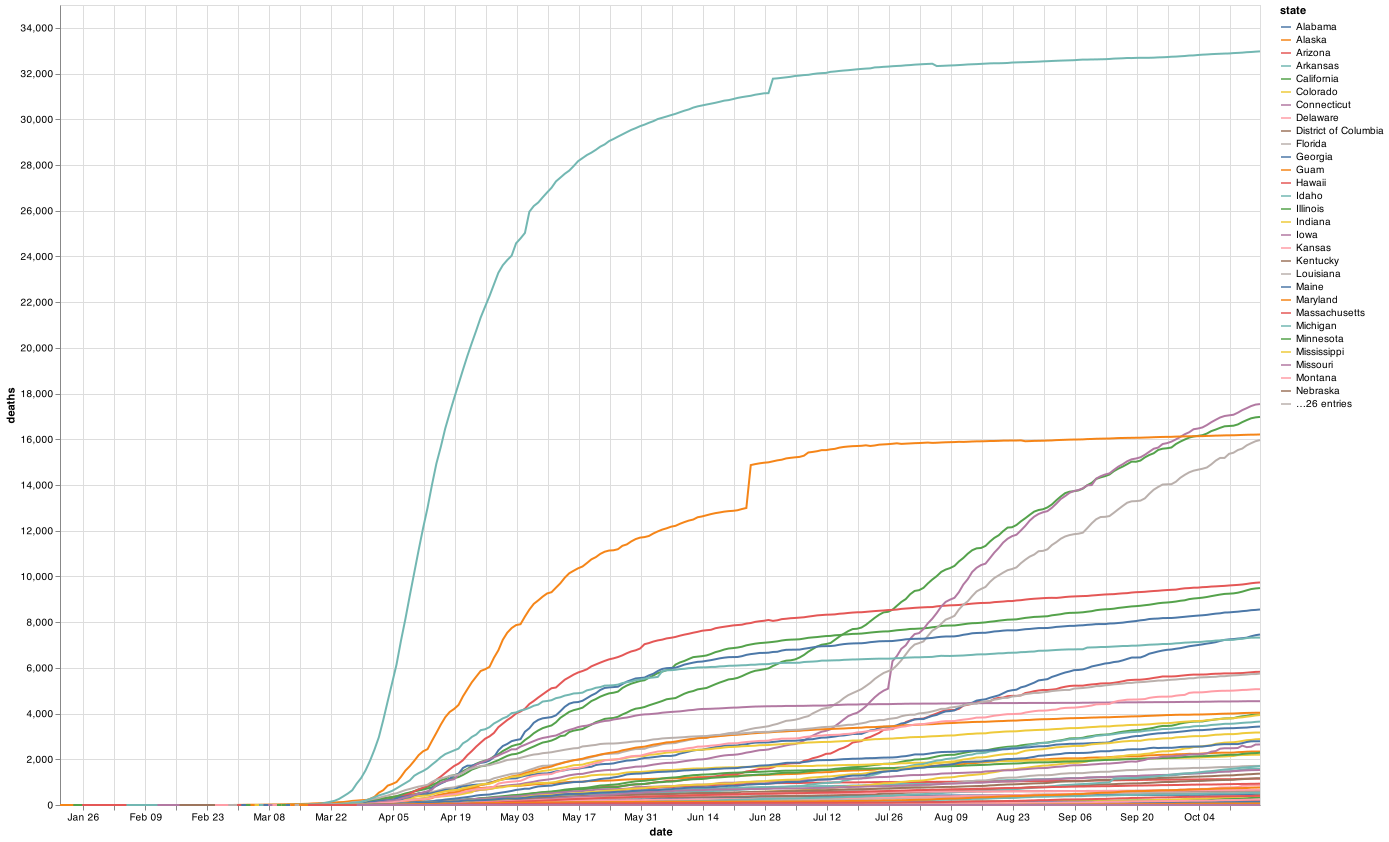

In [30]:
states  |> 
DataFrame |>
@vlplot(
    :line,
    x=:date,
    y=:deaths, 
    width=1200, 
    height=800, 
    color=:state
)

┌ Warning: `by(d::AbstractDataFrame, cols::Any, f::Base.Callable; sort::Bool = false, skipmissing::Bool = false)` is deprecated, use `combine(f, groupby(d, cols, sort = sort, skipmissing = skipmissing))` instead.
│   caller = top-level scope at In[58]:1
└ @ Core In[58]:1


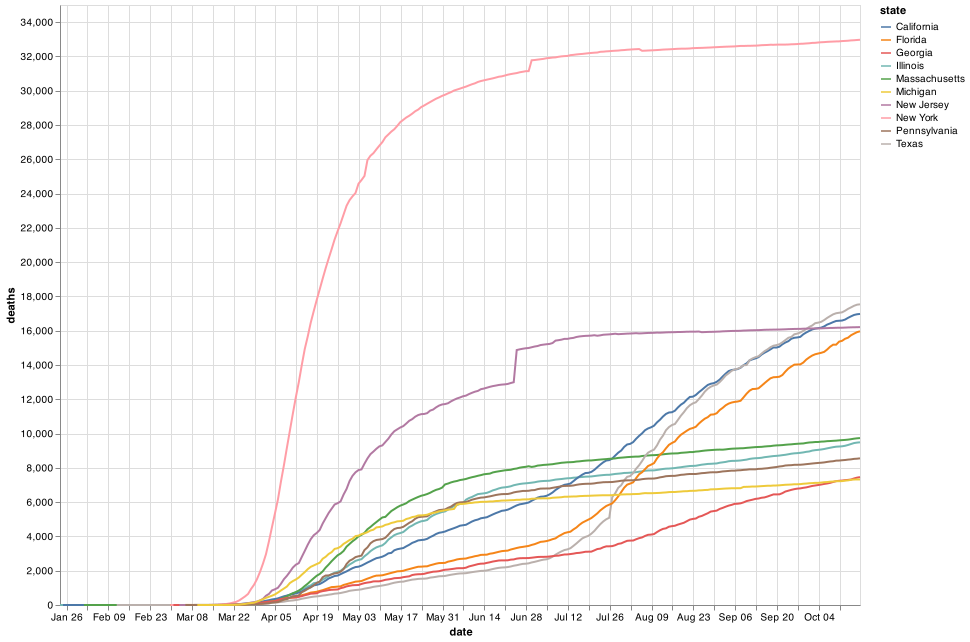

In [58]:
worst_deaths = by(states, :state, s -> maximum(s.deaths)) |> 
  df -> sort(df, :x1, rev=true) |> 
  df -> df[1:10, 1]

states  |> 
@filter(_.state in worst_deaths) |> 
DataFrame |>
@vlplot(
    :line,
    x=:date,
    y=:deaths, 
    width=800, 
    height=600, 
    color=:state
)

┌ Warning: `by(d::AbstractDataFrame, cols::Any, f::Base.Callable; sort::Bool = false, skipmissing::Bool = false)` is deprecated, use `combine(f, groupby(d, cols, sort = sort, skipmissing = skipmissing))` instead.
│   caller = top-level scope at In[59]:1
└ @ Core In[59]:1


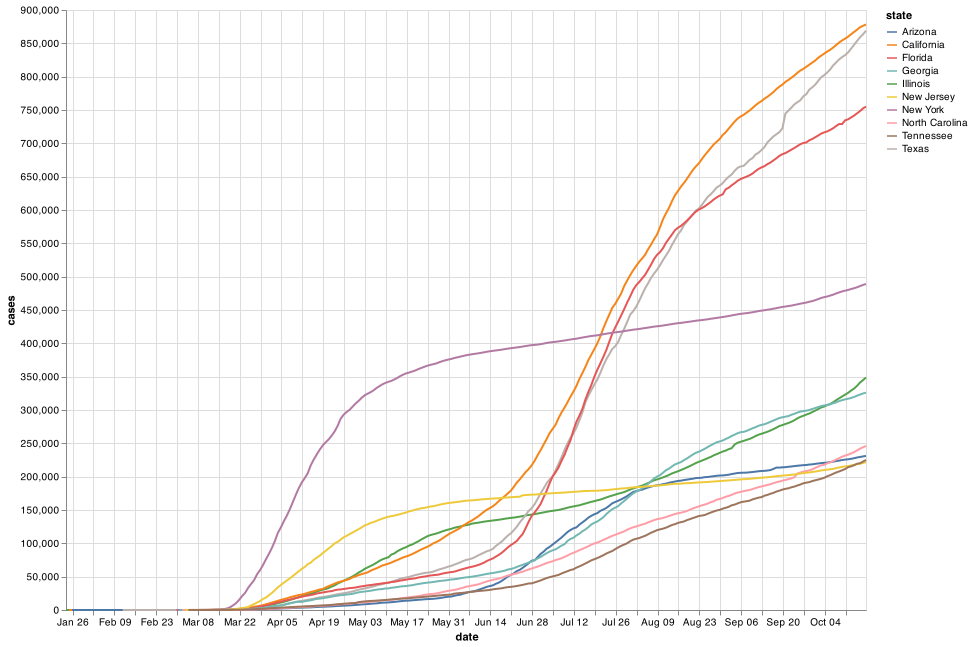

In [59]:
worst_cases = by(states, :state, s -> maximum(s.cases)) |> 
  df -> sort(df, :x1, rev=true) |> 
  df -> df[1:10, 1]

states  |> 
@filter(_.state in worst_cases) |> 
DataFrame |>
@vlplot(
    :line,
    x=:date,
    y=:cases, 
    width=800, 
    height=600, 
    color=:state
)